In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import category_encoders as ce

In [2]:
# Read data
data = pd.read_csv('dashboard_car_inventory.csv')

In [3]:
# Designate features and target label
columns = ['color', 'number_of_seats', 'number_of_doors', 'type_of_gas', 'kilometers_per_liter', 'mileage']
features = data[columns].fillna(0)
target = data['rate'].fillna(0)

In [4]:
# Splits
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [5]:
# Category encoding
encoder = ce.OrdinalEncoder(cols=columns)
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [6]:
# Model training
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [7]:
# Prediction scores
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 3368.67


In [8]:
# Set test parameters
color = 'Green'
number_of_seats = 7.0
number_of_doors = 4.0
type_of_gas = 'Diesel'
kilometers_per_liter = 16.0
mileage = 1300.05
new_data = encoder.fit_transform(
    pd.DataFrame(
        {
            'color': [color],
            'number_of_seats': [number_of_seats],
            'number_of_doors': [number_of_doors],
            'type_of_gas': [type_of_gas],
            'kilometers_per_liter': [kilometers_per_liter],
            'mileage': [mileage],
        }
    )
)

In [9]:
# Make prediction
recommended_price = model.predict(new_data)
print(f"The recommended rental price is PHP {recommended_price[0]:.2f}")

The recommended rental price is PHP 1000.00


In [10]:
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

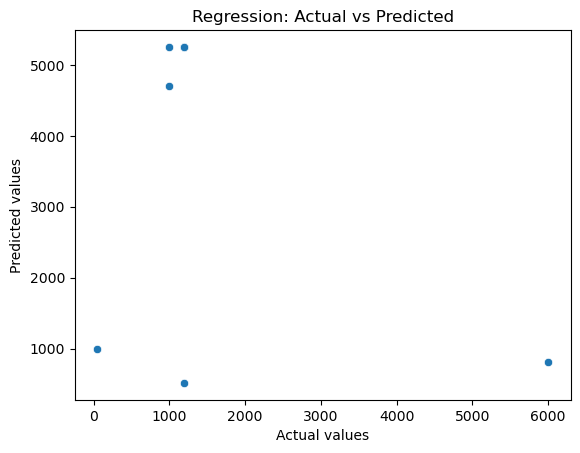

In [11]:
# Scatter plot of regression line
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Regression: Actual vs Predicted')
plt.show()

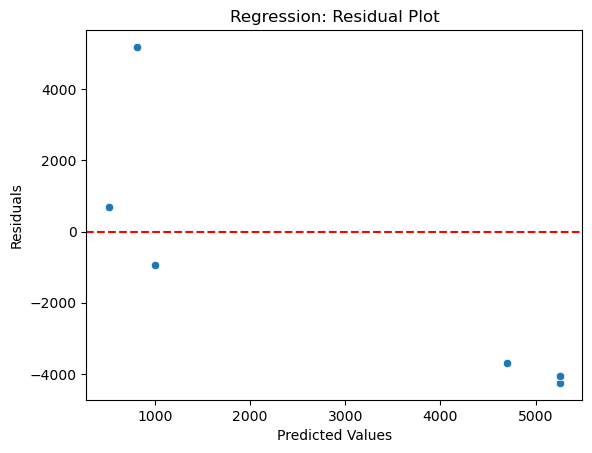

In [12]:
# Residual plot
residuals = y_test - predictions
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Regression: Residual Plot')
plt.show()

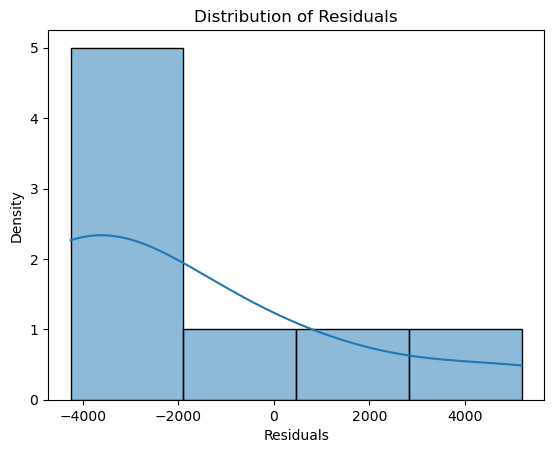

In [13]:
# Distribution of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()